**TREND ANALYSIS**

In [1]:
# 1.	Load the data: First, ensure you have a dataset with annual data for budgets and staff numbers.
#	2.	Data pre-processing: Clean and prepare the data.
#	3.	Visualising the trends: Use line plots to visualise the data over time.
#	4.	Identifying trends: Apply methods to identify underlying trends.
#	5.	Forecasting (optional): Use time series forecasting to predict future trends.

In [2]:
#1. Import necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
#2. Load and inspect the data:
# Example dataset
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Budget': [100000, 120000, 130000, 150000, 170000, 160000, 180000, 190000, 210000, 230000]
}
df = pd.DataFrame(data)

# Set the Year column as the index for easier plotting
df.set_index('Year', inplace=True)

# Display the dataset
print(df)

# Check for missing values
print(df.isnull().sum())

# Check the data types
print(df.dtypes)

      Budget
Year        
2010  100000
2011  120000
2012  130000
2013  150000
2014  170000
2015  160000
2016  180000
2017  190000
2018  210000
2019  230000
Budget    0
dtype: int64
Budget    int64
dtype: object


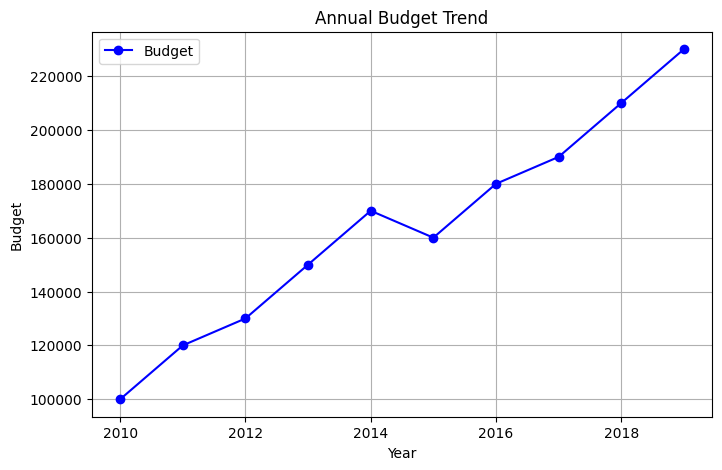

In [11]:
#3. Visualise the trends:
# Plot the budget data over time
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['Budget'], marker='o', color='blue', label='Budget')
plt.title('Annual Budget Trend')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.grid(True)
plt.legend()
plt.show()

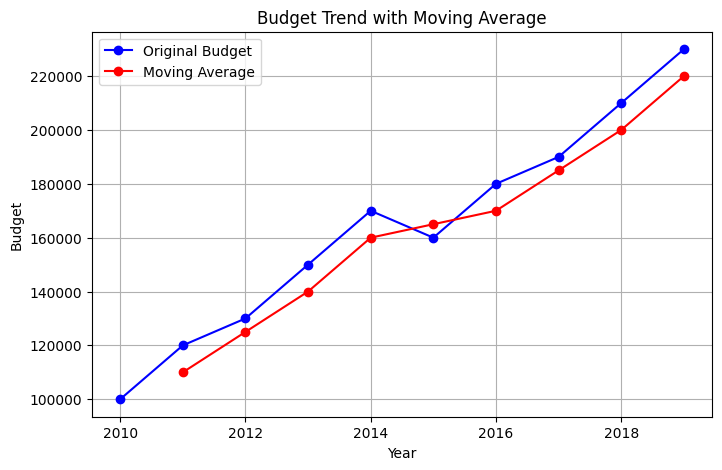

In [14]:
#4.a Identifying the trends: moving average
# Calculate a 2-year moving average
df['Budget_MA'] = df['Budget'].rolling(window=2).mean()

# Plot the original data and moving average
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['Budget'], marker='o', color='blue', label='Original Budget')
plt.plot(df.index, df['Budget_MA'], marker='o', color='red', label='Moving Average')
plt.title('Budget Trend with Moving Average')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.grid(True)
plt.legend()
plt.show()

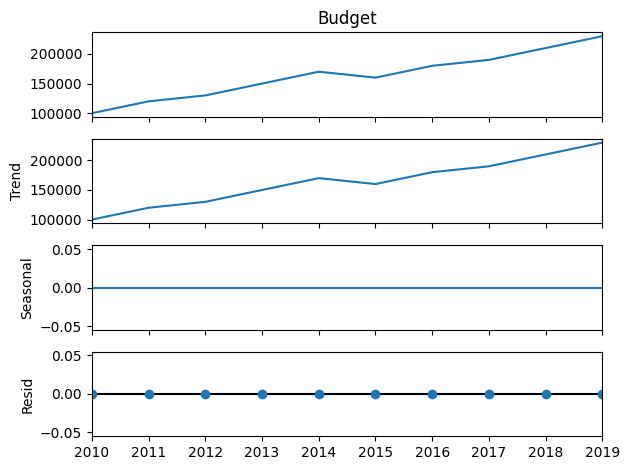

In [15]:
#4.b Identifying the trends: Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the budget time series (you can adjust the period based on your data)
decomposition = seasonal_decompose(df['Budget'], model='additive', period=1)

# Plot the decomposition
decomposition.plot()
plt.show()

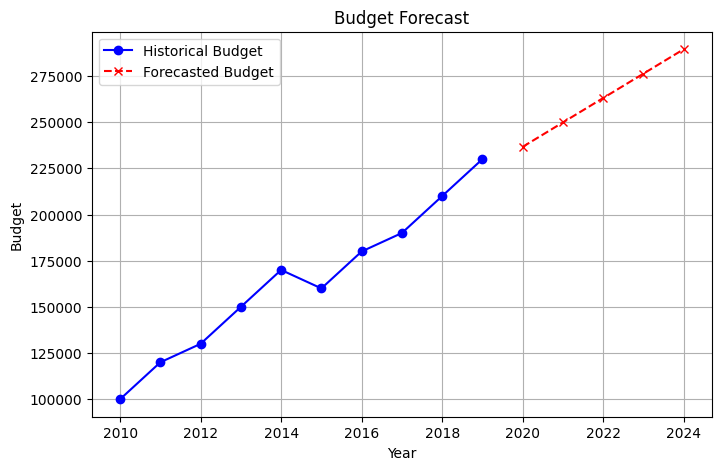

In [16]:
#6. Linear regression forecasting (optional):
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X = np.array(df.index).reshape(-1, 1)  # Year as the independent variable
y = df['Budget']  # Budget as the dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future budgets for the next 5 years
future_years = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
predicted_budget = model.predict(future_years)

# Plot the historical and forecasted budget
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['Budget'], label='Historical Budget', marker='o', color='blue')
plt.plot(future_years, predicted_budget, label='Forecasted Budget', marker='x', linestyle='--', color='red')
plt.title('Budget Forecast')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.legend()
plt.grid(True)
plt.show()

**COMPARISON ANALYSIS (Pre-2014 and Post-2014)**

In [ ]:
#Steps for the comparison analysis on the previous dataset
#	1.	Split the data into two subsets: one for data before 2014 and one for data after 2014.
#	2.	Calculate summary statistics for each subset, such as the mean, median, and standard deviation.
#	3.	Visualise the comparison using plots to highlight the difference between the two periods.
#	4.	Hypothesis testing (optional) to determine if the difference between the two periods is statistically significant.

In [17]:
#1. Split the Data
# Split the data into two subsets: before 2014 and after 2014
df_before_2014 = df[df.index < 2014]
df_after_2014 = df[df.index >= 2014]

# Display the two subsets
print("Budget data before 2014:")
print(df_before_2014)

print("\nBudget data after 2014:")
print(df_after_2014)

Budget data before 2014:
      Budget  Budget_MA
Year                   
2010  100000        NaN
2011  120000   110000.0
2012  130000   125000.0
2013  150000   140000.0

Budget data after 2014:
      Budget  Budget_MA
Year                   
2014  170000   160000.0
2015  160000   165000.0
2016  180000   170000.0
2017  190000   185000.0
2018  210000   200000.0
2019  230000   220000.0


In [18]:
#2. Calculate Summary Statistics
# Summary statistics for budget before 2014
stats_before_2014 = df_before_2014['Budget'].describe()
print("Summary statistics before 2014:")
print(stats_before_2014)

# Summary statistics for budget after 2014
stats_after_2014 = df_after_2014['Budget'].describe()
print("\nSummary statistics after 2014:")
print(stats_after_2014)

Summary statistics before 2014:
count         4.000000
mean     125000.000000
std       20816.659995
min      100000.000000
25%      115000.000000
50%      125000.000000
75%      135000.000000
max      150000.000000
Name: Budget, dtype: float64

Summary statistics after 2014:
count         6.000000
mean     190000.000000
std       26076.809621
min      160000.000000
25%      172500.000000
50%      185000.000000
75%      205000.000000
max      230000.000000
Name: Budget, dtype: float64


<Figure size 800x500 with 0 Axes>

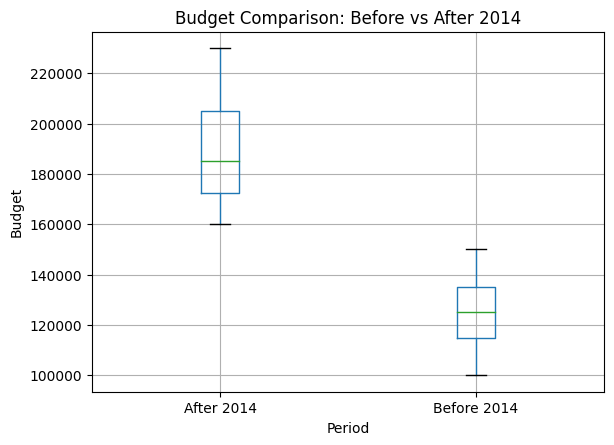

In [19]:
#3. Visualise the Comparison
#A. Box Plot:
# Combine the two periods for visualisation
df['Period'] = ['Before 2014' if year < 2014 else 'After 2014' for year in df.index]

# Plot a box plot for comparison
plt.figure(figsize=(8, 5))
df.boxplot(column='Budget', by='Period')
plt.title('Budget Comparison: Before vs After 2014')
plt.suptitle('')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

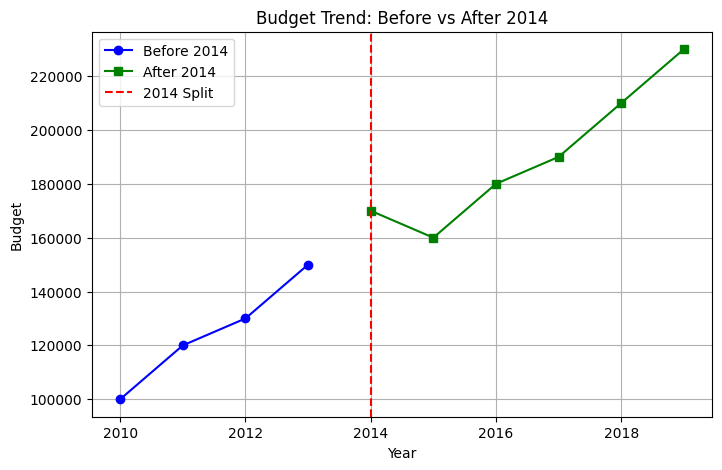

In [20]:
#B. Line Plot:
# Line plot to show the budget trend
plt.figure(figsize=(8, 5))
plt.plot(df_before_2014.index, df_before_2014['Budget'], marker='o', label='Before 2014', color='blue')
plt.plot(df_after_2014.index, df_after_2014['Budget'], marker='s', label='After 2014', color='green')
plt.axvline(x=2014, color='red', linestyle='--', label='2014 Split')
plt.title('Budget Trend: Before vs After 2014')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#4. Hypothesis Testing (Optional): to test if the difference in budget between the two periods is statistically significant using a t-test
from scipy.stats import ttest_ind

# Perform t-test to compare the means of the two periods
t_stat, p_value = ttest_ind(df_before_2014['Budget'], df_after_2014['Budget'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the budgets before and after 2014.")
else:
    print("There is no statistically significant difference between the budgets before and after 2014.")

T-statistic: -4.154464402072199
P-value: 0.003189358071251949
There is a statistically significant difference between the budgets before and after 2014.
